In [1]:
import matplotlib.pyplot as plot
import numpy as np
import odespy

%matplotlib inline

In [2]:
from pyclouds import cloud_microphysics, parameterisations
from pyclouds.common import Var
from pyclouds.plotting import plot_hydrometeor_evolution

from unified_microphysics.tests.test_common import um_constants

(pure fortran `no_ice` model with rkf34): Integration stopped, solution became nan                                                                                 
1 1
(pure fortran `no_ice` model with rkf34): Integration stopped, solution became nan                                                                                 
1 1


/usr/lib/pymodules/python2.7/matplotlib/axes.py:2667: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=287.5, top=287.5
  + 'bottom=%s, top=%s') % (bottom, top))


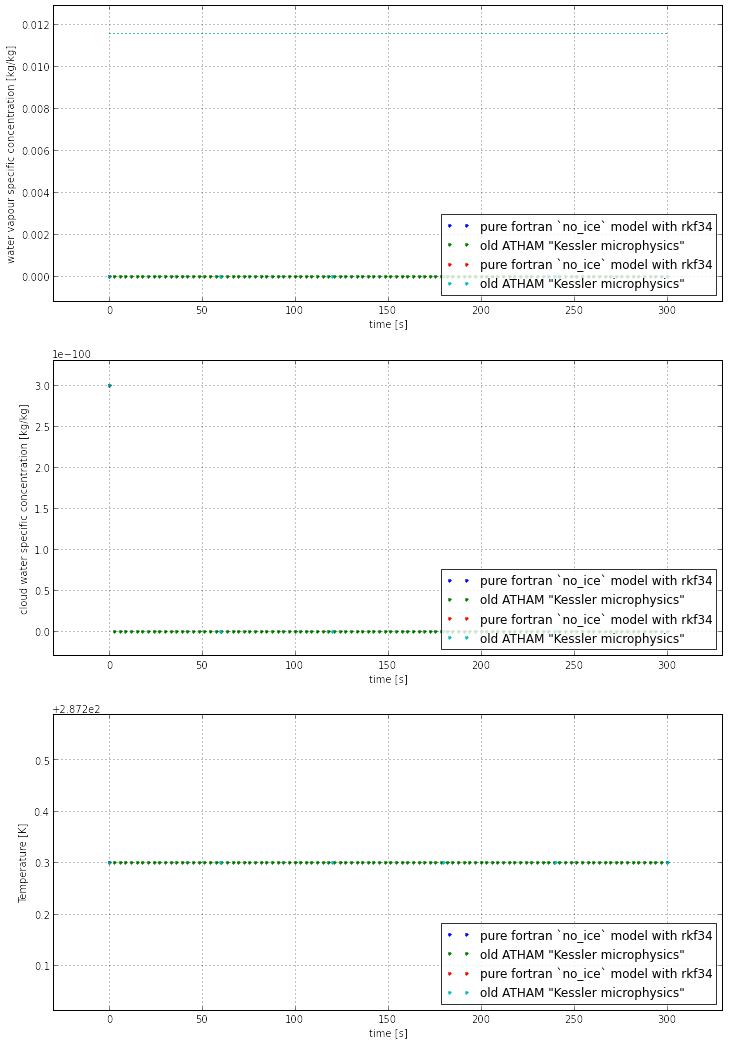

In [6]:
initial_condition = np.zeros((Var.NUM))
initial_condition[Var.q_v] =  1.2E-100
initial_condition[Var.q_l] = 3.0E-100

initial_condition[Var.T] = 287.5
p0 = 87360.0  # [Pa]

t_max = 300.
dt_l = 60.

t_ = np.linspace(0., t_max, 100)

solutions = []
solutions.append(cloud_microphysics.ExplicitFortranModel().integrate(initial_condition=initial_condition, t=t_, p0=p0))
solutions.append(cloud_microphysics.OldATHAMKesslerFortran().integrate(initial_condition=initial_condition, t=t_, p0=p0))

t_ = np.linspace(0., t_max, t_max/dt_l+1)

solutions.append(cloud_microphysics.ExplicitFortranModel().integrate(initial_condition=initial_condition, t=t_, p0=p0))
solutions.append(cloud_microphysics.OldATHAMKesslerFortran().integrate(initial_condition=initial_condition, t=t_, p0=p0))



#sol2.plot()
plot = plot_hydrometeor_evolution(solutions, variables=['q_v', 'q_l', 'T',], legend_loc='lower right')

In [ ]:
print p0